In [22]:
# Charger le fichier CSV pour exploration
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
file_path = 'users_data_1.csv'
users = pd.read_csv(file_path)

# Afficher les premières lignes pour vérifier le contenu
users.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us


In [24]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
users.describe() # donne des informations statistiques

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,9.891300e+04,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,-6.692039e+15,3.432269,8.425677,4.420743,0.093304,0.121592,0.812303,1.562595,0.171929,1.773993,581.291236,3063.771870,102.125583,8.510424
std,5.330807e+18,3.882383,52.839572,181.030569,2.050144,2.126895,8.500205,25.192793,2.332266,0.428679,208.855888,168.298621,5.609735,0.467863
min,-9.223101e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.622895e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,572.000000,2857.000000,95.230000,7.940000
50%,-1.337989e+15,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,694.000000,3196.000000,106.530000,8.880000
75%,4.616388e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,702.000000,3201.000000,106.700000,8.890000
max,9.223331e+18,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,709.000000,3205.000000,106.830000,8.900000


In [28]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

In [30]:
len(users) # nombre total d'utilisateurs

98913

Répartition des utilisateurs par langue

language
en    51564
fr    26372
it     7766
de     7178
es     6033
Name: count, dtype: int64


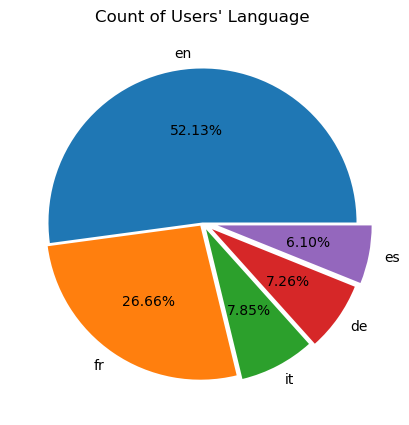

In [33]:
vc_language = users['language'].value_counts()

print(vc_language)

plt.figure(figsize=(5, 5))
plt.title("Count of Users' Language")
vc_language.plot.pie(
    labels=vc_language.index, 
    autopct='%1.2f%%',  # Two decimal places in percentages
    explode=[x / 40 for x in range(0, len(vc_language))]  # Exploding slices for better visualization
)
plt.ylabel("")  # Removes y-axis label
plt.show()

Nombre de utilisateurs par genre

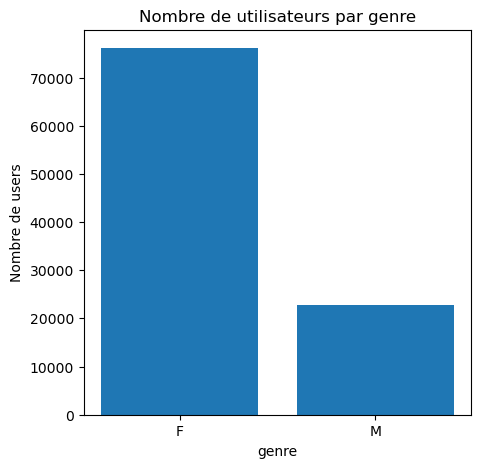

In [36]:
gender_count=users['gender'].value_counts().reset_index()


plt.figure(figsize=(5,5) )

plt.bar(gender_count['gender'], gender_count['count'])



plt.xlabel('genre')

plt.ylabel('Nombre de users')

plt.title ('Nombre de utilisateurs par genre')

plt.show()

In [38]:
group_names=['No','Oui']
q=plt.bar(group_names, users['hasAnyApp'].value_counts())

# set x/y labels and plot title
plt.xlabel("Avoir une App")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Nombre d'utilisateurs ayant une Application")

Text(0.5, 1.0, "Nombre d'utilisateurs ayant une Application")

In [40]:
group_names=['mrs','mr','miss']
plt.bar(group_names, height=users['civilityTitle'].value_counts())

# set x/y labels and plot title
plt.xlabel("Titre de civilité")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Nombre d'utilisateurs par Titre de civilité")

Text(0.5, 1.0, "Nombre d'utilisateurs par Titre de civilité")

In [42]:
civility_title = users['civilityTitle'].value_counts()

print(civility_title)



plt.figure(figsize=(7,7) )

plt.title("Nombre d'utilisateurs par Titre de civilité")

civility_title.plot.pie(labels=civility_title.index, autopct='%0f%%', explode=[x/40 for x in range(0, len(civility_title), 1) ] )

plt.ylabel("")

civilityTitle
mrs     75684
mr      22792
miss      437
Name: count, dtype: int64


Text(0, 0.5, '')

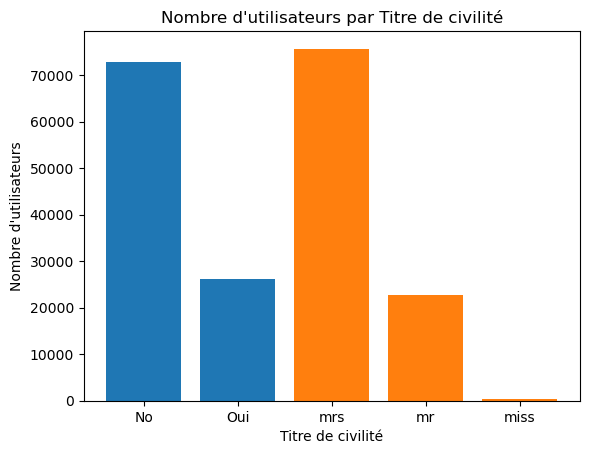

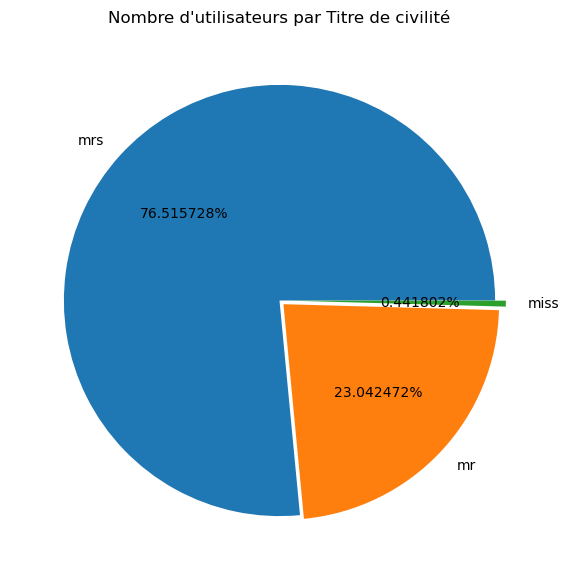

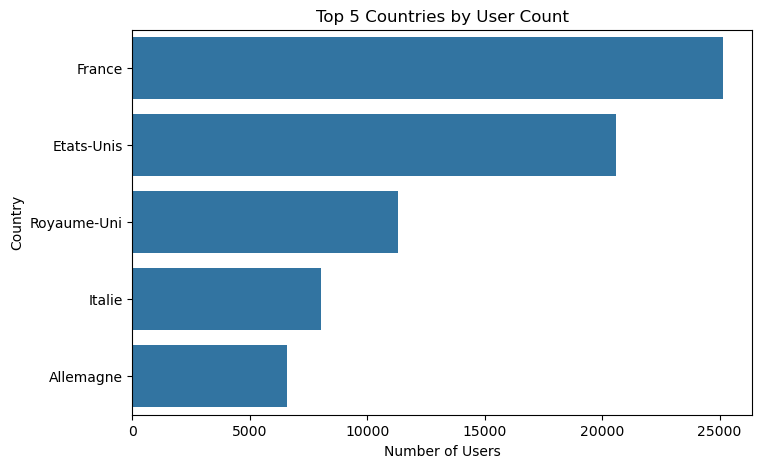

In [44]:
# Top 5 countries by user count
top_countries = users['country'].value_counts().head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 5 Countries by User Count')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.show()

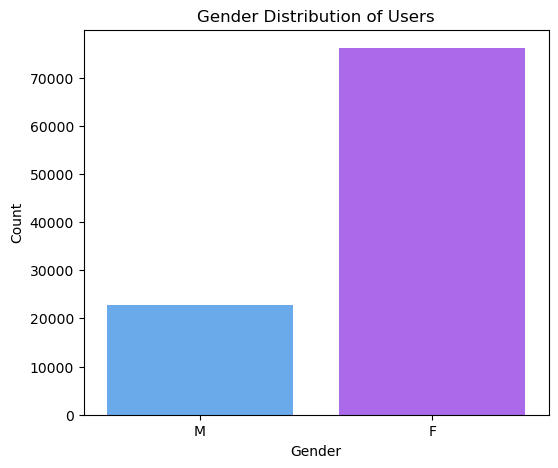

In [46]:
plt.figure(figsize=(6, 5))
sns.countplot(data=users, x='gender', palette='cool')
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

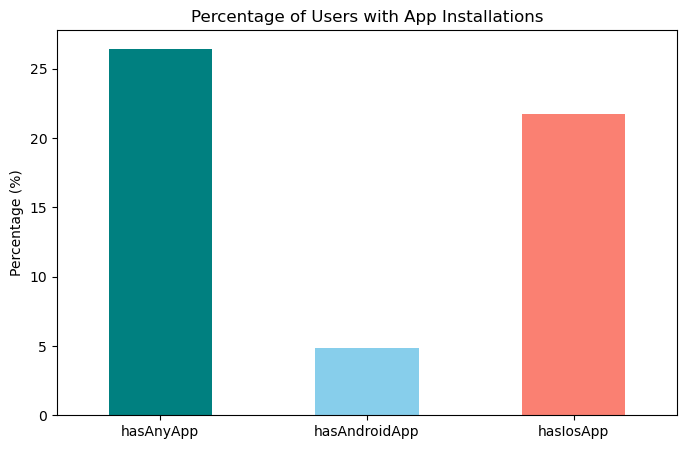

In [48]:
# App usage comparison
app_usage = users[['hasAnyApp', 'hasAndroidApp', 'hasIosApp']].mean() * 100  # Convert to percentage

plt.figure(figsize=(8, 5))
app_usage.plot(kind='bar', color=['teal', 'skyblue', 'salmon'])
plt.title('Percentage of Users with App Installations')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.show()

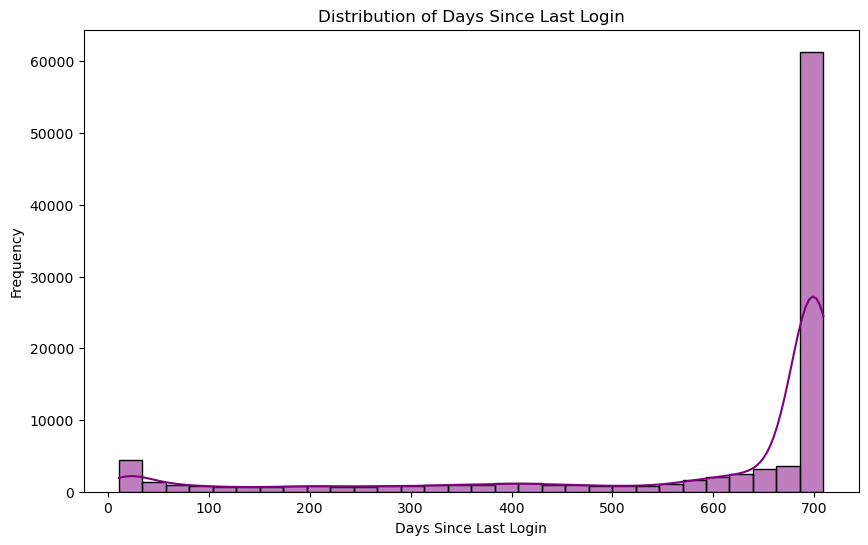

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(users['daysSinceLastLogin'], bins=30, kde=True, color='purple')
plt.title('Distribution of Days Since Last Login')
plt.xlabel('Days Since Last Login')
plt.ylabel('Frequency')
plt.show()

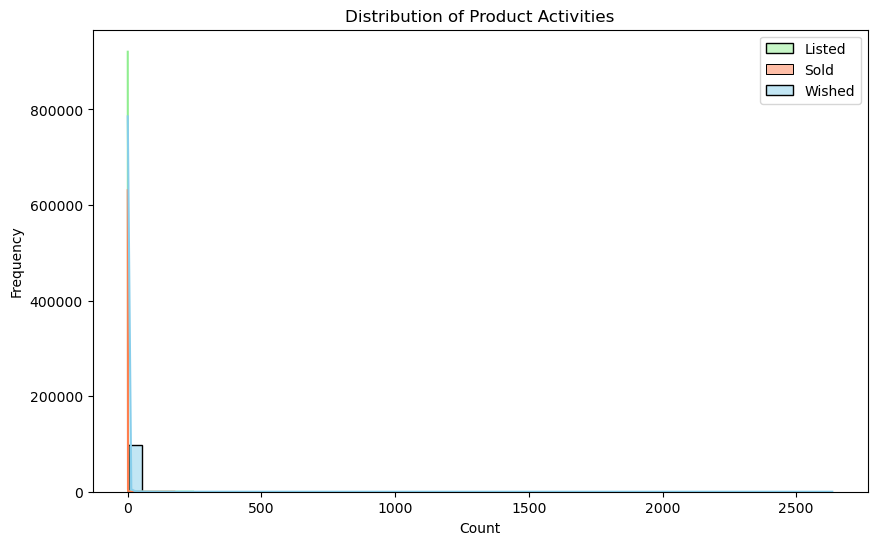

In [52]:
# Visualizing products listed, sold, and wished
plt.figure(figsize=(10, 6))
sns.histplot(users['productsListed'], bins=50, kde=True, color='lightgreen', label='Listed')
sns.histplot(users['productsSold'], bins=50, kde=True, color='coral', label='Sold')
sns.histplot(users['productsWished'], bins=50, kde=True, color='skyblue', label='Wished')
plt.title('Distribution of Product Activities')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

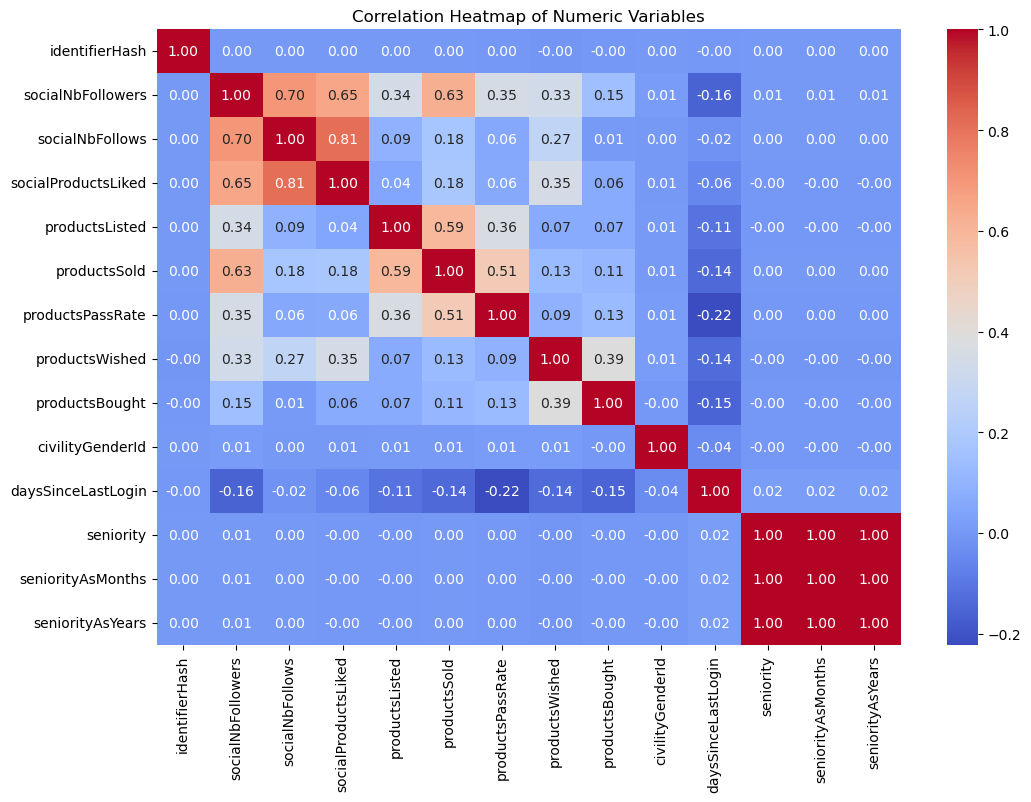

In [53]:
# Selecting numeric columns for correlation analysis
numeric_cols = users.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = users[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

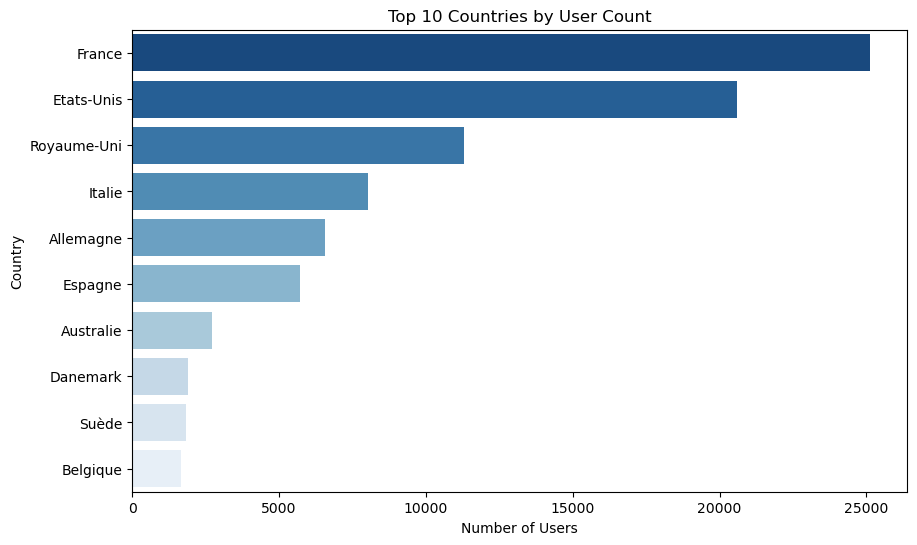

In [54]:
# Top 10 countries by user count
top_countries = users['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')
plt.title('Top 10 Countries by User Count')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.show()

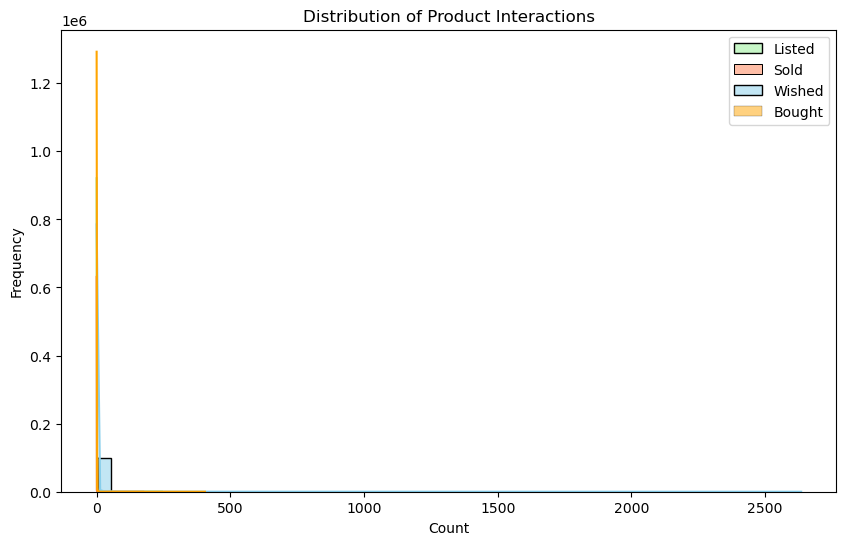

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(users['productsListed'], bins=50, kde=True, color='lightgreen', label='Listed')
sns.histplot(users['productsSold'], bins=50, kde=True, color='coral', label='Sold')
sns.histplot(users['productsWished'], bins=50, kde=True, color='skyblue', label='Wished')
sns.histplot(users['productsBought'], bins=50, kde=True, color='orange', label='Bought')
plt.title('Distribution of Product Interactions')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

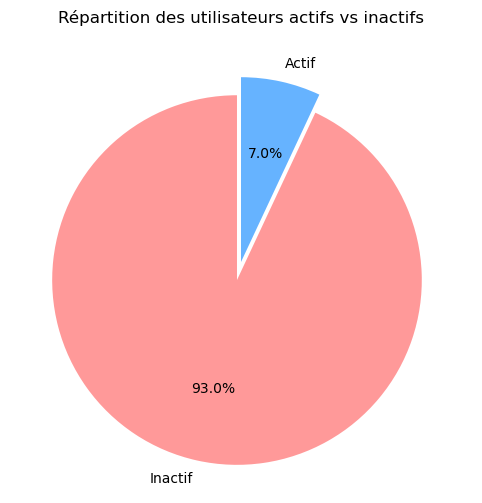

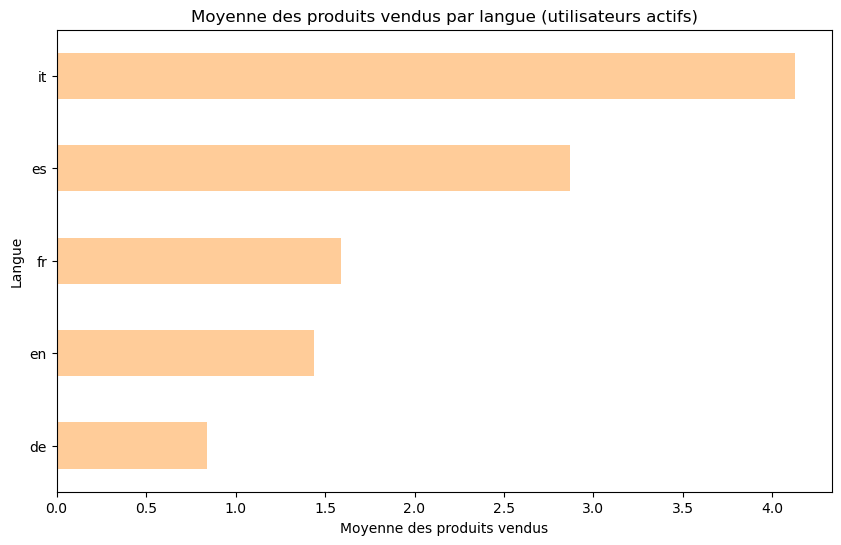

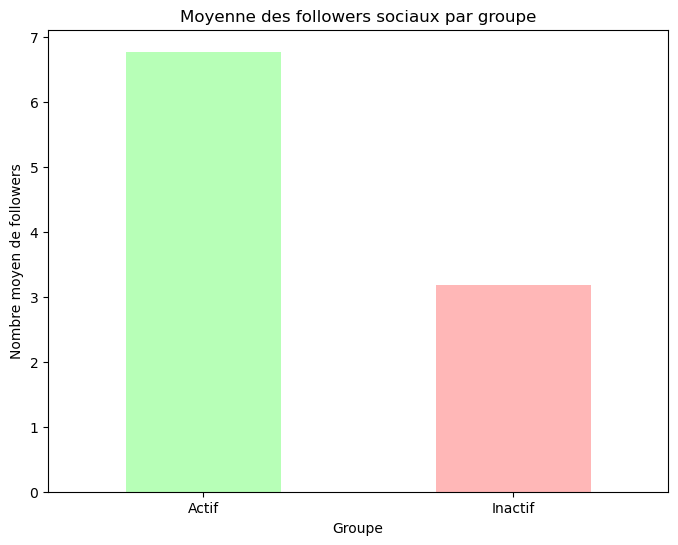

In [59]:
import matplotlib.pyplot as plt

# 1. Répartition des utilisateurs actifs vs inactifs
users['ActivityStatus'] = users.apply(
    lambda row: 'Actif' if row['productsSold'] > 0 or row['productsBought'] > 0 else 'Inactif',
    axis=1
)

activity_counts = users['ActivityStatus'].value_counts()

# Visualisation 1 : Répartition des utilisateurs actifs/inactifs
plt.figure(figsize=(8, 6))
activity_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], startangle=90, explode=(0.1, 0))
plt.title("Répartition des utilisateurs actifs vs inactifs")
plt.ylabel('')  # Retirer l'étiquette de l'axe Y pour un meilleur rendu
plt.show()

# 2. Moyenne des produits vendus par langue pour les actifs
active_users = users[users['ActivityStatus'] == 'Actif']
average_sales_by_language = active_users.groupby('language')['productsSold'].mean().sort_values()

# Visualisation 2 : Moyenne des produits vendus par langue
plt.figure(figsize=(10, 6))
average_sales_by_language.plot(kind='barh', color='#ffcc99')
plt.title("Moyenne des produits vendus par langue (utilisateurs actifs)")
plt.xlabel("Moyenne des produits vendus")
plt.ylabel("Langue")
plt.show()

# 3. Suivi social (followers) pour les actifs/inactifs
social_followers_avg = users.groupby('ActivityStatus')['socialNbFollowers'].mean()

# Visualisation 3 : Moyenne des followers par activité
plt.figure(figsize=(8, 6))
social_followers_avg.plot(kind='bar', color=['#99ff99', '#ff9999'], alpha=0.7)
plt.title("Moyenne des followers sociaux par groupe")
plt.xlabel("Groupe")
plt.ylabel("Nombre moyen de followers")
plt.xticks(rotation=0)
plt.show()

# Ces graphiques seront utilisés dans la présentation. 


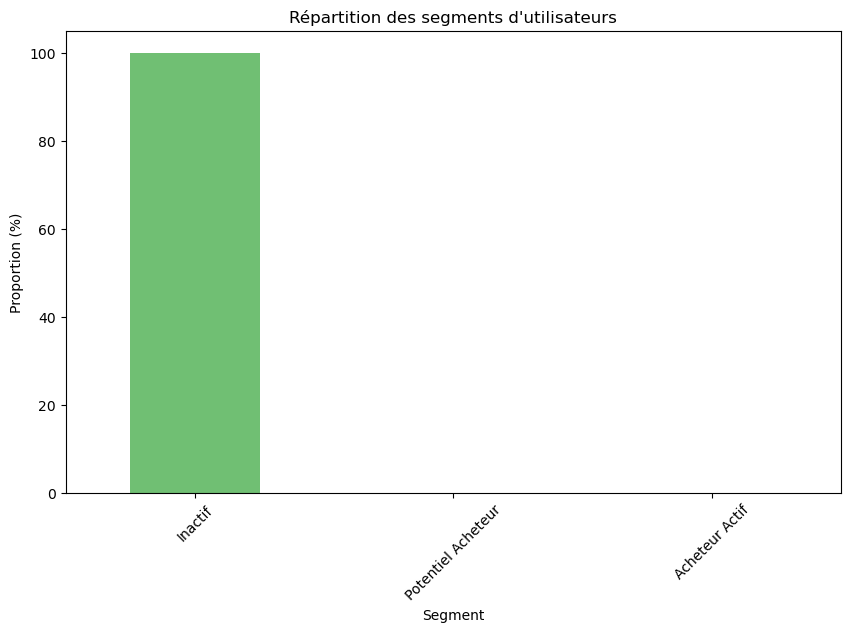

UserSegment
Inactif               99.979780
Potentiel Acheteur     0.015165
Acheteur Actif         0.005055
Name: proportion, dtype: float64

In [60]:
# Définir des seuils pour l'activité sociale
social_threshold_high = 1000  # Fort nombre de followers
social_threshold_low = 100    # Faible à modéré

# Fonction pour créer les segments d'utilisateurs
def segment_user(row):
    if row['productsSold'] > 0 and row['socialNbFollowers'] >= social_threshold_high:
        return "Vendeur Actif"
    elif row['productsBought'] > 0 and row['socialNbFollowers'] >= social_threshold_low:
        return "Acheteur Actif"
    elif row['productsSold'] == 0 and row['socialNbFollowers'] >= social_threshold_high:
        return "Potentiel Vendeur"
    elif row['productsBought'] == 0 and row['socialNbFollowers'] >= social_threshold_low:
        return "Potentiel Acheteur"
    else:
        return "Inactif"

# Ajouter une colonne de segmentation
users['UserSegment'] = users.apply(segment_user, axis=1)

# Proportions des segments
segment_counts =users['UserSegment'].value_counts(normalize=True) * 100

# Visualiser les segments
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color=['#4CAF50', '#FFC107', '#2196F3', '#FF5722', '#9E9E9E'], alpha=0.8)
plt.title("Répartition des segments d'utilisateurs")
plt.xlabel("Segment")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=45)
plt.show()

# Afficher les proportions pour le résumé
segment_counts


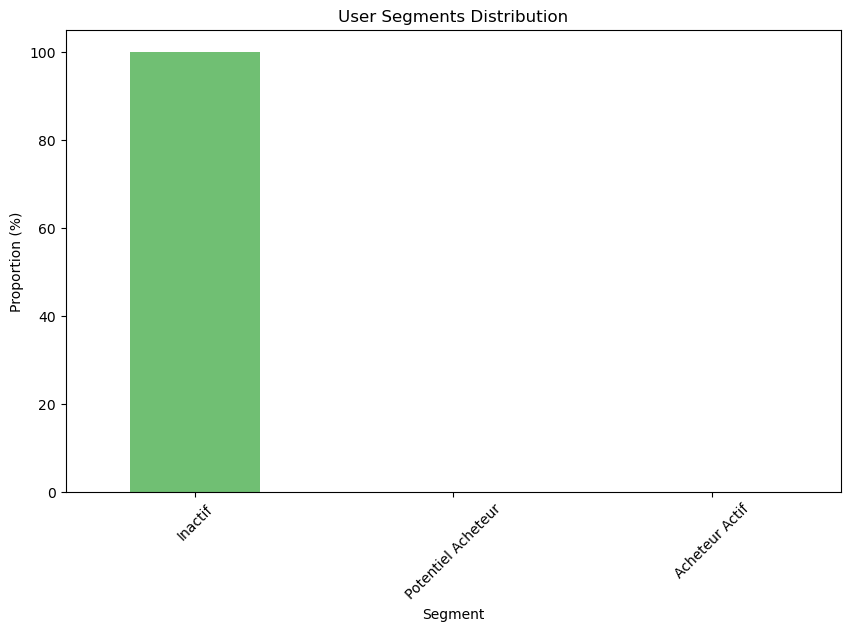

UserSegment
Inactif               99.979780
Potentiel Acheteur     0.015165
Acheteur Actif         0.005055
Name: proportion, dtype: float64


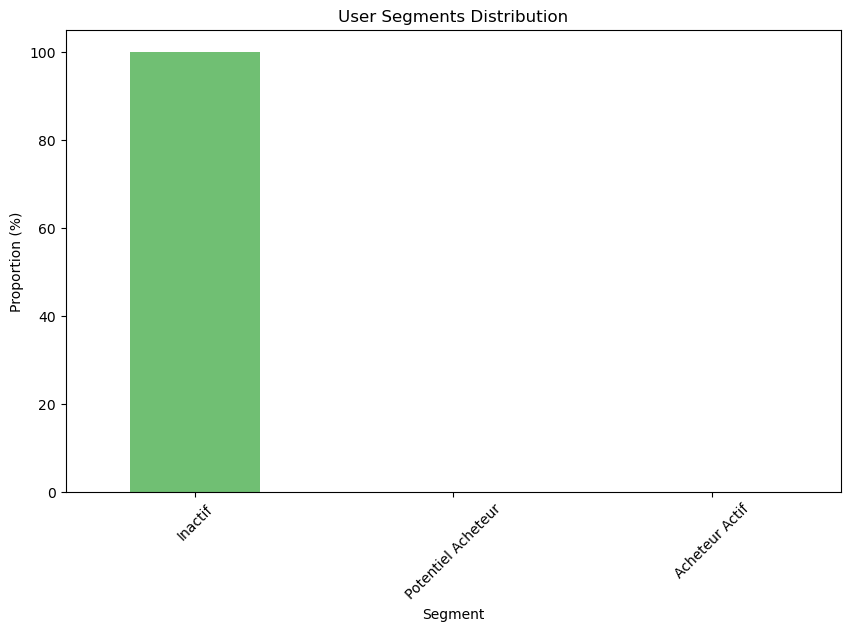

UserSegment
Inactif               99.979780
Potentiel Acheteur     0.015165
Acheteur Actif         0.005055
Name: proportion, dtype: float64


In [62]:
# Define thresholds for social activity
social_threshold_high = 1000  # High social activity
social_threshold_low = 100    # Low to moderate social activity

# Function to create user segments
def segment_user(row):
    if row['productsSold'] > 0 and row['socialNbFollowers'] >= social_threshold_high:
        return "Vendeur Actif"
    elif row['productsBought'] > 0 and row['socialNbFollowers'] >= social_threshold_low:
        return "Acheteur Actif"
    elif row['productsSold'] == 0 and row['socialNbFollowers'] >= social_threshold_high:
        return "Potentiel Vendeur"
    elif row['productsBought'] == 0 and row['socialNbFollowers'] >= social_threshold_low:
        return "Potentiel Acheteur"
    else:
        return "Inactif"

# Apply segmentation
# Define thresholds for social activity
social_threshold_high = 1000  # High social activity
social_threshold_low = 100    # Low to moderate social activity

# Function to create user segments
def segment_user(row):
    if row['productsSold'] > 0 and row['socialNbFollowers'] >= social_threshold_high:
        return "Vendeur Actif"
    elif row['productsBought'] > 0 and row['socialNbFollowers'] >= social_threshold_low:
        return "Acheteur Actif"
    elif row['productsSold'] == 0 and row['socialNbFollowers'] >= social_threshold_high:
        return "Potentiel Vendeur"
    elif row['productsBought'] == 0 and row['socialNbFollowers'] >= social_threshold_low:
        return "Potentiel Acheteur"
    else:
        return "Inactif"

# Apply segmentation
users['UserSegment'] = users.apply(segment_user, axis=1)


# Calculate proportions
segment_counts = users['UserSegment'].value_counts(normalize=True) * 100

# Visualize segments
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color=['#4CAF50', '#FFC107', '#2196F3', '#FF5722', '#9E9E9E'], alpha=0.8)
plt.title("User Segments Distribution")
plt.xlabel("Segment")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=45)
plt.show()

# Print segment proportions
print(segment_counts)
users['UserSegment'] = users.apply(segment_user, axis=1)


# Calculate proportions
segment_counts = users['UserSegment'].value_counts(normalize=True) * 100

# Visualize segments
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color=['#4CAF50', '#FFC107', '#2196F3', '#FF5722', '#9E9E9E'], alpha=0.8)
plt.title("User Segments Distribution")
plt.xlabel("Segment")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=45)
plt.show()

# Print segment proportions
print(segment_counts)


<Figure size 1000x600 with 0 Axes>

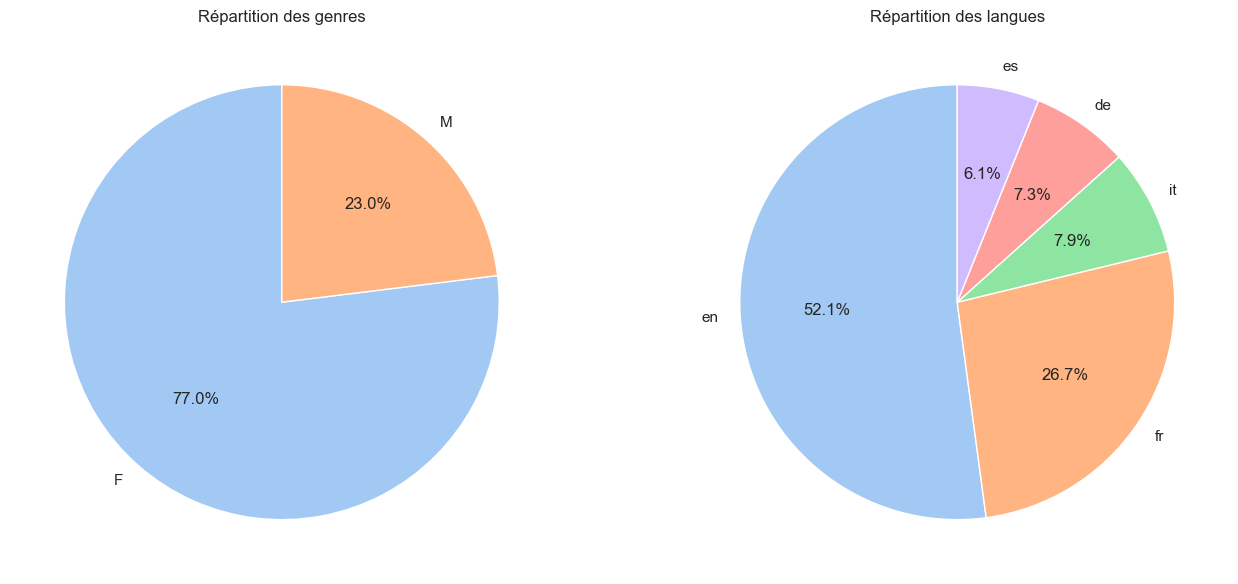

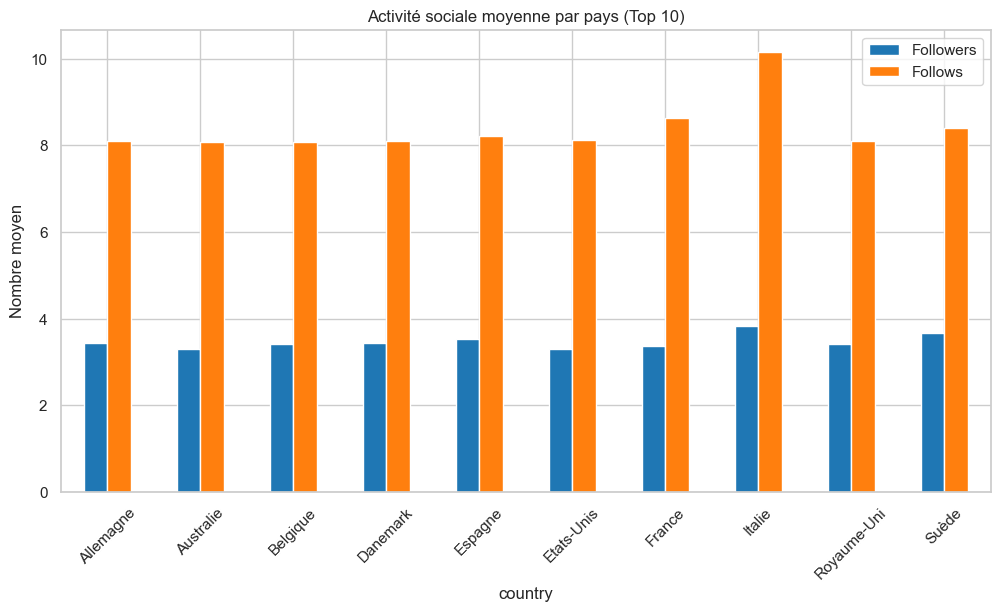

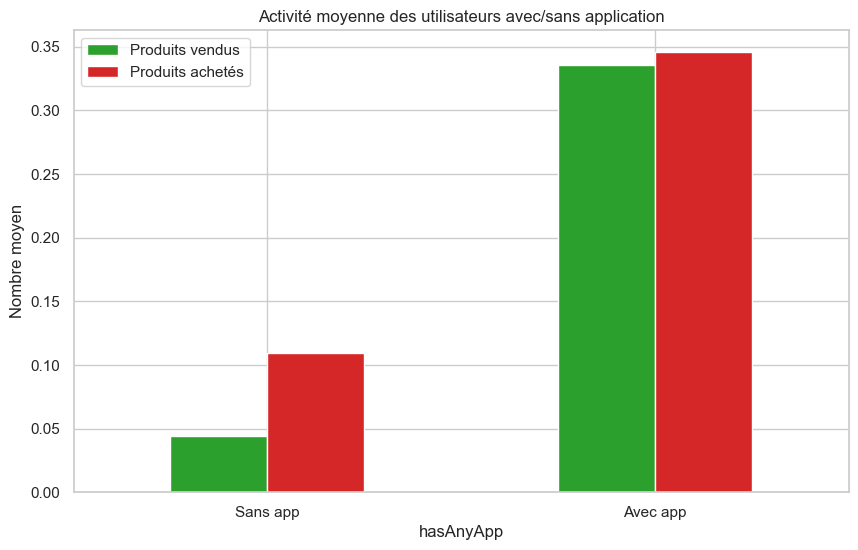

,socialNbFollowers,productsListed,productsSold,seniority,productsBought
count,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,3.432269,0.093304,0.121592,3063.771870,0.171929
std,3.882383,2.050144,2.126895,168.298621,2.332266
min,3.000000,0.000000,0.000000,2852.000000,0.000000
25%,3.000000,0.000000,0.000000,2857.000000,0.000000
50%,3.000000,0.000000,0.000000,3196.000000,0.000000
75%,3.000000,0.000000,0.000000,3201.000000,0.000000
max,744.000000,244.000000,174.000000,3205.000000,405.000000


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paramètres de style pour les visualisations
sns.set_theme(style="whitegrid")

# 1. Distribution des genres et des langues
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Distribution des genres
gender_counts = users['gender'].value_counts()
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axes[0].set_title('Répartition des genres')

# Distribution des langues
language_counts = users['language'].value_counts()
axes[1].pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axes[1].set_title('Répartition des langues')

plt.tight_layout()
plt.show()

# 2. Activité sociale par pays (top 10)
top_countries = users['country'].value_counts().head(10).index
country_data = users[users['country'].isin(top_countries)]
social_activity = country_data.groupby('country')[['socialNbFollowers', 'socialNbFollows']].mean()

social_activity.plot(kind='bar', figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title("Activité sociale moyenne par pays (Top 10)")
plt.ylabel("Nombre moyen")
plt.xticks(rotation=45)
plt.legend(["Followers", "Follows"])
plt.show()


# 3. Comparaison des utilisateurs avec et sans applications
app_usage = users.groupby('hasAnyApp')[['productsSold', 'productsBought']].mean()
app_usage.plot(kind='bar', figsize=(10, 6), color=['#2ca02c', '#d62728'])
plt.title("Activité moyenne des utilisateurs avec/sans application")
plt.ylabel("Nombre moyen")
plt.xticks([0, 1], ['Sans app', 'Avec app'], rotation=0)
plt.legend(["Produits vendus", "Produits achetés"])
plt.show()

# 4. Statistiques descriptives principales
descriptive_stats = users[['socialNbFollowers', 'productsListed', 'productsSold', 'seniority', 'productsBought']].describe()
descriptive_stats


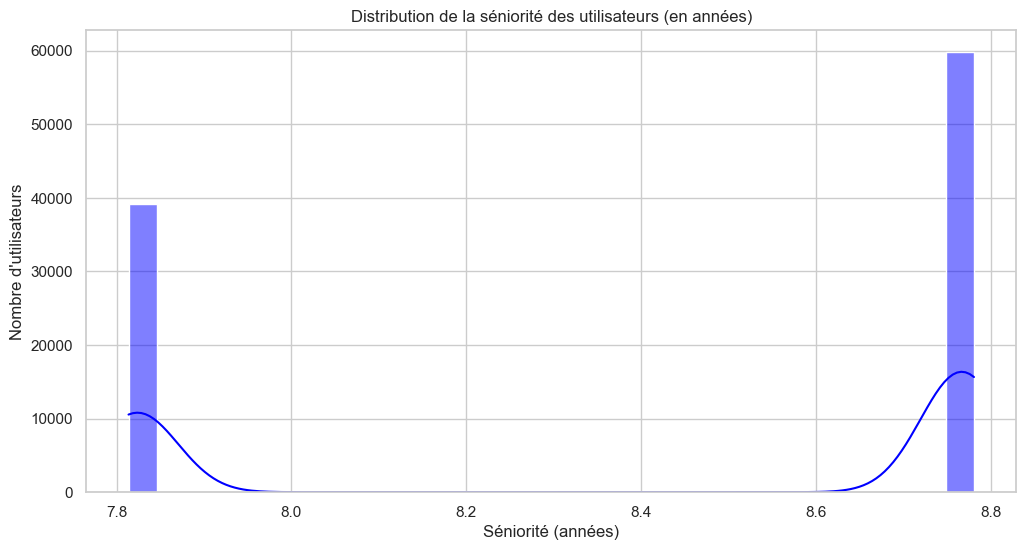

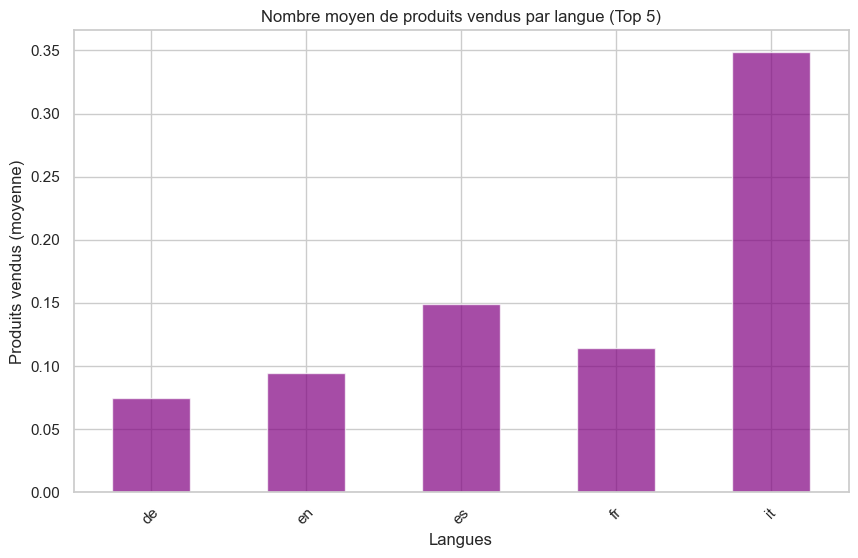

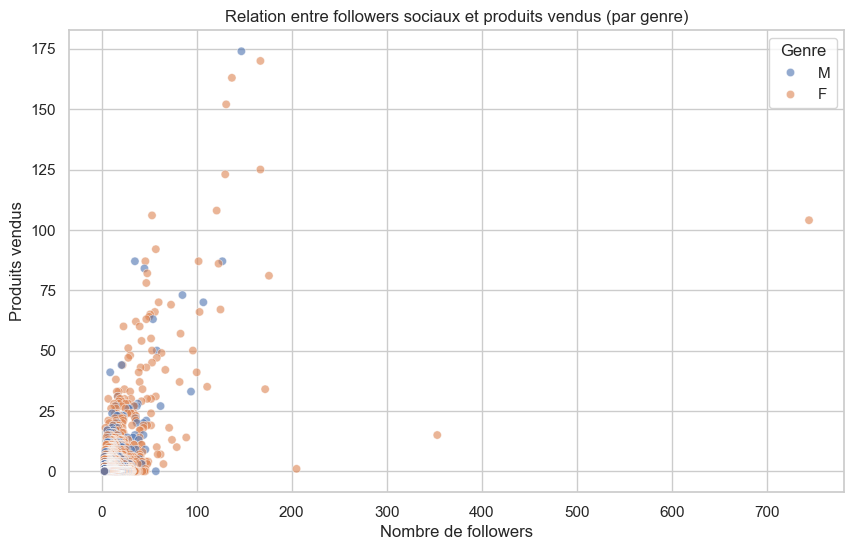

{"Nombre total d'utilisateurs inactifs": 92020,
 "Pourcentage d'inactifs": 93.0312496840658}

In [98]:
# 1. Corriger et visualiser la distribution de la séniorité des utilisateurs
plt.figure(figsize=(12, 6))
sns.histplot(users['seniority'] / 365, bins=30, kde=True, color='blue')
plt.title("Distribution de la séniorité des utilisateurs (en années)")
plt.xlabel("Séniorité (années)")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

# 2. Comparaison des ventes par langues principales
top_languages = users['language'].value_counts().head(5).index
language_data = users[users['language'].isin(top_languages)]
avg_sales_language = language_data.groupby('language')['productsSold'].mean()

avg_sales_language.plot(kind='bar', figsize=(10, 6), color='purple', alpha=0.7)
plt.title("Nombre moyen de produits vendus par langue (Top 5)")
plt.ylabel("Produits vendus (moyenne)")
plt.xlabel("Langues")
plt.xticks(rotation=45)
plt.show()

# 3. Relations entre activité sociale, produits vendus, et séniorité
plt.figure(figsize=(10, 6))
sns.scatterplot(x='socialNbFollowers', y='productsSold', hue='gender', data=users, alpha=0.6)
plt.title("Relation entre followers sociaux et produits vendus (par genre)")
plt.xlabel("Nombre de followers")
plt.ylabel("Produits vendus")
plt.legend(title="Genre")
plt.show()

# 4. Identifier les utilisateurs les plus actifs
top_sellers = users.nlargest(10, 'productsSold')[['identifierHash', 'productsSold', 'country', 'language', 'seniority']]
top_sellers

# 5. Analyse des utilisateurs n'ayant jamais vendu/acheté de produits
inactive_users = users[(users['productsSold'] == 0) & (users['productsBought'] == 0)]
inactive_percentage = len(inactive_users) / len(users) * 100

inactive_users_analysis = {
    "Nombre total d'utilisateurs inactifs": len(inactive_users),
    "Pourcentage d'inactifs": inactive_percentage
}

inactive_users_analysis
